# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv("sinasc_RO_2019.csv")
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'asfx_cat'] = 'asfixia severa'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'asfx_cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'asfx_cat'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] >= 8, 'asfx_cat'] = 'normal'

print(sinasc[['APGAR5', 'asfx_cat']])
sinasc[['APGAR5', 'asfx_cat']].value_counts()

       APGAR5 asfx_cat
0        10.0   normal
1         9.0   normal
2        10.0   normal
3        10.0   normal
4        10.0   normal
...       ...      ...
27023     9.0   normal
27024     9.0   normal
27025    10.0   normal
27026     9.0   normal
27027     8.0   normal

[27028 rows x 2 columns]


APGAR5  asfx_cat        
9.0     normal              16076
10.0    normal               8393
8.0     normal               1994
7.0     asfixia leve          241
6.0     asfixia leve           79
5.0     asfixia moderada       45
1.0     asfixia severa         24
4.0     asfixia moderada       23
2.0     asfixia severa         18
0.0     asfixia severa         17
3.0     asfixia severa         15
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
print(sinasc.columns)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'asfx_cat'],
   

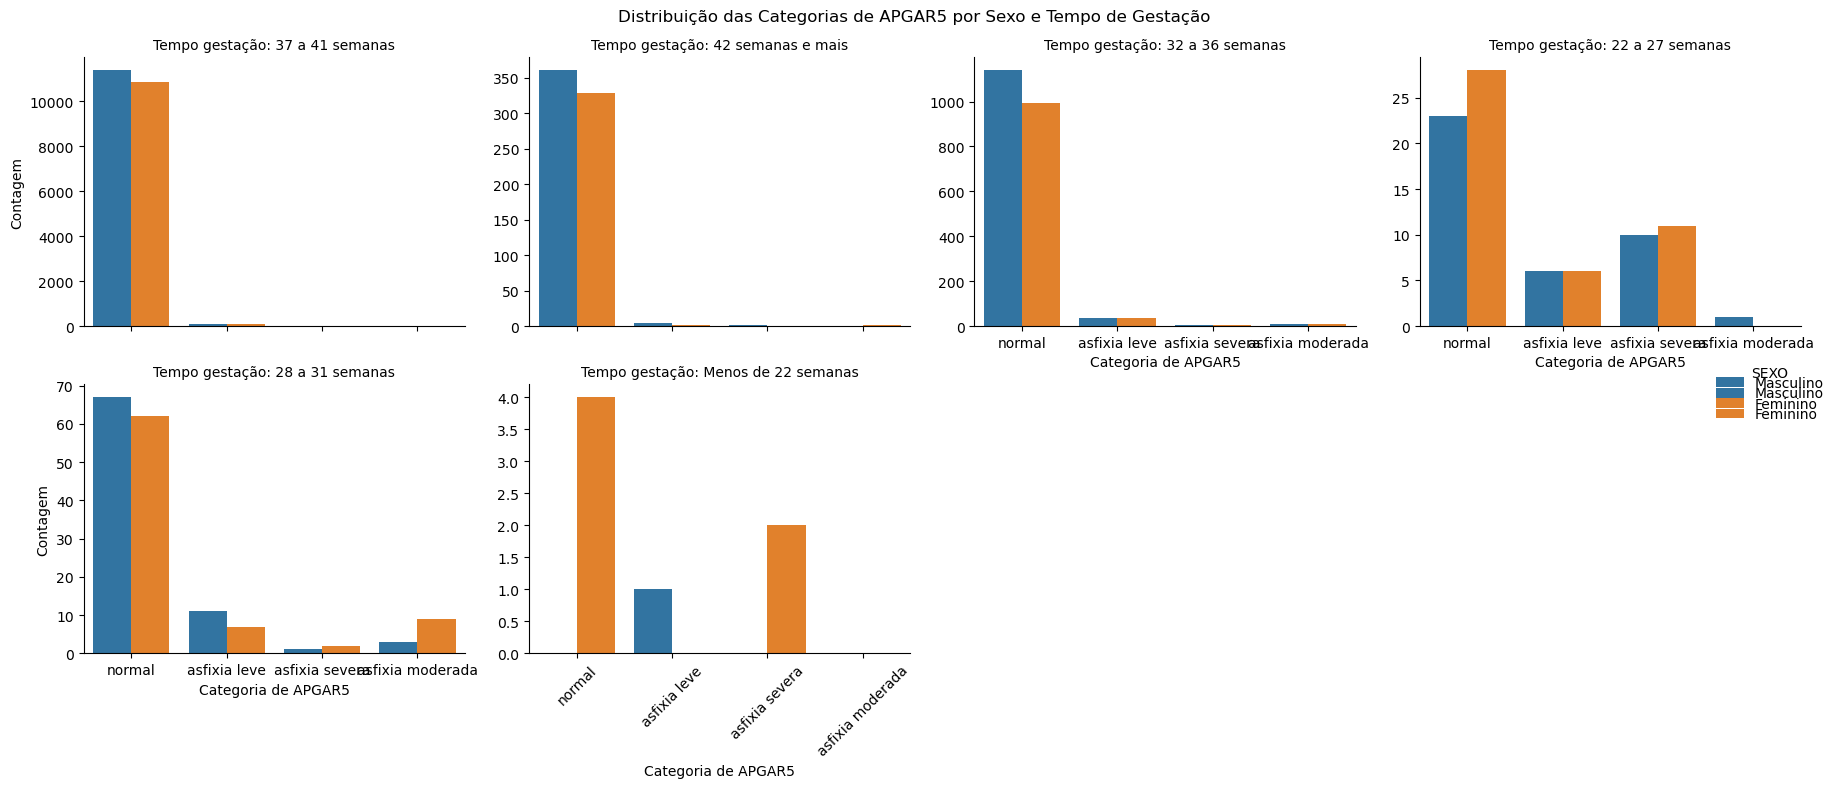

In [4]:
df = sinasc[['asfx_cat', 'SEXO', 'GESTACAO']].dropna()

g = sns.catplot(
    data=df,
    kind="count",
    x="asfx_cat",
    hue="SEXO",
    col="GESTACAO",
    col_wrap=4,
    height=4,
    aspect=1,
    sharey=False
)

# Ajustes de layout
g.set_titles("Tempo gestação: {col_name}")
g.set_axis_labels("Categoria de APGAR5", "Contagem")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribuição das Categorias de APGAR5 por Sexo e Tempo de Gestação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
tabela_percentual = pd.crosstab(
    sinasc['GESTACAO'],
    sinasc['APGAR5'],
    normalize='index'
).round(4) * 100 

tabela_percentual

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.09,0.09,0.36,0.49,0.76,2.51,16.20,58.50,20.81
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95
Menos de 22 semanas,14.29,0.00,14.29,0.00,0.00,0.00,0.00,14.29,0.00,42.86,14.29


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

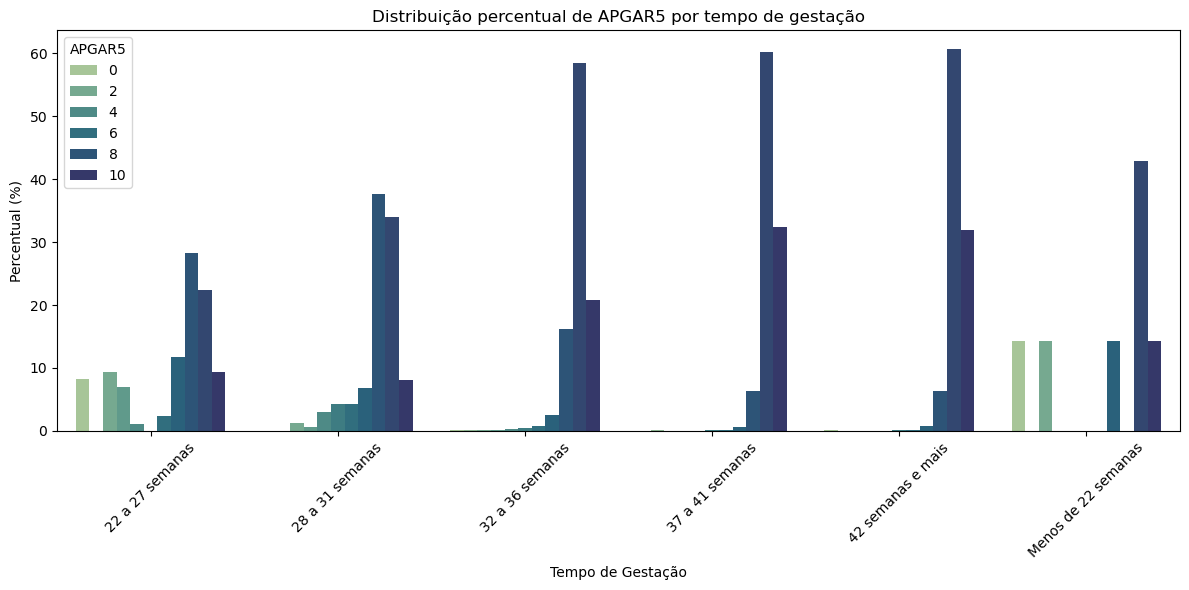

In [7]:
tabela_long = tabela_percentual.reset_index().melt(id_vars='GESTACAO', var_name='APGAR5', value_name='Percentual')

plt.figure(figsize=(12, 6))
sns.barplot(data=tabela_long, x='GESTACAO', y='Percentual', hue='APGAR5', palette='crest')

plt.title('Distribuição percentual de APGAR5 por tempo de gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')
plt.legend(title='APGAR5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir da análise da tabela cruzada entre o escore de APGAR5 e o tempo de gestação, visualizada através de um gráfico de barras percentuais, é possível observar uma tendência entro os partos com menos de 37 semanas de gestação, eles apresentam uma maior proporção de escores baixos de APGAR5, o que indica maior risco de asfixia ao nascimento, o que é um forte indicativo que corrobora com a afirmação médica, que estipula os partos prematuros como sendo aqueles que ocorrem entes de 37 semanas. E também corrobora a afirmação médica de que partos prematuros estão mais associados a quadros de sofrimento neonatal, reforçando a importância do acompanhamento adequado durante a gestação para evitar partos precoces.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

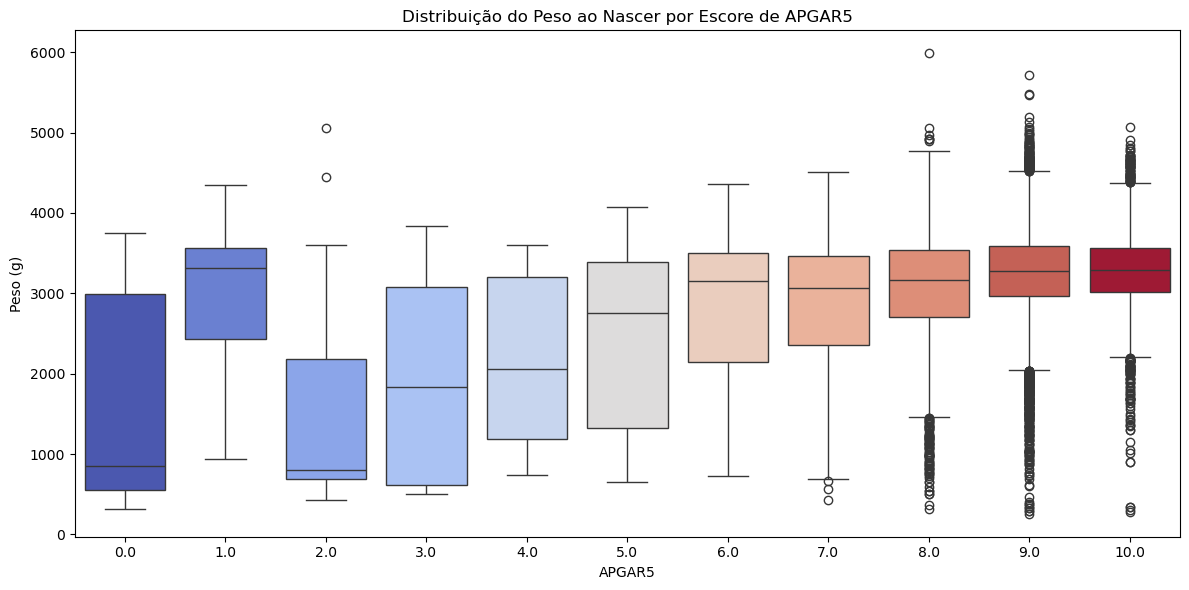

In [8]:
df = sinasc[['APGAR5', 'PESO']].dropna()

df['APGAR5'] = pd.to_numeric(df['APGAR5'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='APGAR5', y='PESO', hue='APGAR5', palette='coolwarm', legend=False)

plt.title('Distribuição do Peso ao Nascer por Escore de APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso (g)')
plt.tight_layout()
plt.show()

A partir da análise gráfica da relação entre o peso ao nascer e o escore de APGAR5, observou-se uma tendência clara: bebês com menor peso tendem a apresentar escores mais baixos de APGAR5, indicando maior risco de complicações no nascimento.

No boxplot, é possível notar que os escores mais baixos de APGAR5 concentram pesos medianos menores, além de uma maior dispersão e presença de valores extremos baixos (possivelmente associados a prematuridade ou complicações). Conforme o APGAR5 aumenta, há uma tendência de aumento nos valores medianos de peso, com menor variação e ausência de extremos muito baixos.

Portanto, os dados corroboram a hipótese de que o peso ao nascer está relacionado à vitalidade do recém-nascido.